# Quantized inverse dynamic for  Go -Explore

In [2]:
import gym_continuous_maze
import numpy as np
from stable_baselines3 import DDPG

from lge import LatentGoExplore

lge = LatentGoExplore(
    DDPG,
    "ContinuousMaze-v0",
    distance_threshold=1.0,
    p=0.05,
    latent_size=4,
    lighten_dist_coef=1.0,
    verbose=1,
)

lge.explore(100_000)

Creating environment from the given name 'ContinuousMaze-v0'
pygame 2.1.2 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 71.2     |
|    ep_rew_mean     | -36.2    |
|    success_rate    | 0.75     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 826      |
|    time_elapsed    | 0        |
|    total_timesteps | 285      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 61.1     |
|    ep_rew_mean     | -18.1    |
|    success_rate    | 0.875    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 825      |
|    time_elapsed    | 0        |
|    total_timesteps | 489      |
---------------------------------
---------------------------------
| rollout/           |    

Plot an exploration measure.

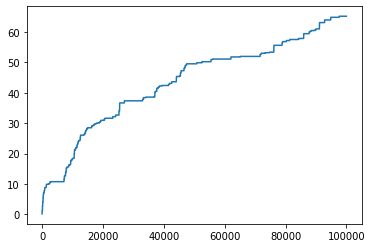

In [3]:
from toolbox.maze_grid import compute_coverage
import matplotlib.pyplot as plt

archive = lge.archive
observations = archive.observations["observation"][: archive.pos]
counts = compute_coverage(observations)
plt.plot(counts / (24 * 24) * 100)

In [4]:
lge.model.env.render()

Sample goals and trajectories. Draw them and store the image into `goals_and_traj.bmp`.

In [5]:
lge.archive.recompute_embeddings()

In [6]:
from toolbox.render_maze import render_and_save

traj = [lge.archive.sample_trajectory()[0] for _ in range(2)]
goals = [lge.archive.sample_trajectory()[0][-1] for _ in range(1000)]

env = lge.model.env.envs[0]
render_and_save(
    all_pos=env.all_pos,
    walls=env.walls,
    filename="goals_and_traj.bmp",
    trajectories=traj,
    goals=goals,
)

Render the latent space and the observation space to see the cells.

Test wether the inverse model is accurate.

In [7]:
# Sample one transition
sample = lge.archive.sample(1)
observations = sample.observations["observation"]
next_observations = sample.next_observations["observation"]
actions = sample.actions

# Predict the action
lge.archive.inverse_model.eval()
pred_actions = lge.archive.inverse_model(observations, next_observations)

# See the result
print("observation\t\t", observations)
print("next observation\t", next_observations)
print("true action\t\t", actions)
print("predicted action\t", pred_actions)

AttributeError: 'ArchiveBuffer' object has no attribute 'inverse_model'